In [20]:
# Percorso del file
file_path = 'predictions_2024-12-18T23-08-11.414072.csv'  # Modifica con il percorso del tuo file

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   timestamp          812 non-null    object
 1   elapsed_time_ms    812 non-null    int64 
 2   effective_time_ms  812 non-null    int64 
 3   className          812 non-null    object
 4   accuracy           812 non-null    object
 5   recording_state    812 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.2+ KB
None

Prime righe del dataset:
                    timestamp  elapsed_time_ms  effective_time_ms  \
0  2024-12-18T23:08:11.429512               12                 12   
1  2024-12-18T23:08:11.479468               62                 62   
2  2024-12-18T23:08:11.513876               96                 96   
3  2024-12-18T23:08:11.546935              129                129   
4  2024-12-18T23:08:11.597372              180                180  

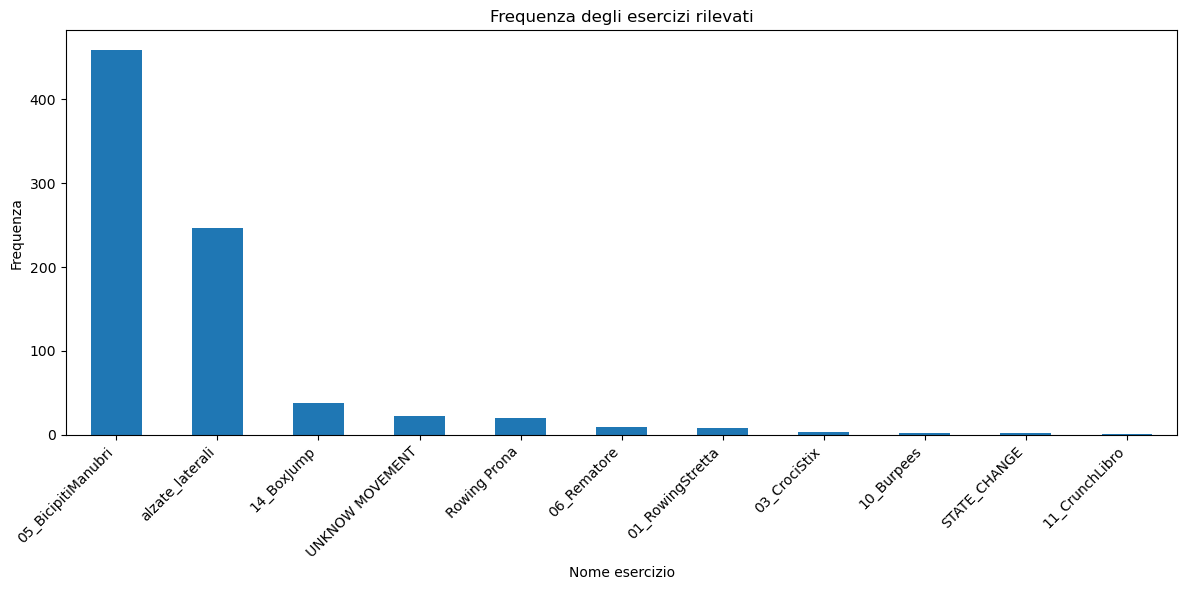


Risultati dell'analisi:

Durata totale complessiva di movimento: 234.06 secondi

Durata totale per ogni esercizio:
- UNKNOW MOVEMENT: 19.09 secondi
- 05_BicipitiManubri: 52.91 secondi
- 06_Rematore: 28.03 secondi
- alzate_laterali: 34.76 secondi
- 10_Burpees: 5.47 secondi
- Rowing Prona: 30.49 secondi
- 01_RowingStretta: 28.90 secondi
- 14_BoxJump: 31.40 secondi
- 11_CrunchLibro: 0.00 secondi
- 03_CrociStix: 2.20 secondi
- STATE_CHANGE: 0.80 secondi

Ripetizioni stimate con 2 secondi per ripetizione:
- UNKNOW MOVEMENT: 9.55 ripetizioni
- 05_BicipitiManubri: 26.46 ripetizioni
- 06_Rematore: 14.02 ripetizioni
- alzate_laterali: 17.38 ripetizioni
- 10_Burpees: 2.74 ripetizioni
- Rowing Prona: 15.24 ripetizioni
- 01_RowingStretta: 14.45 ripetizioni
- 14_BoxJump: 15.70 ripetizioni
- 11_CrunchLibro: 0.00 ripetizioni
- 03_CrociStix: 1.10 ripetizioni
- STATE_CHANGE: 0.40 ripetizioni

Ripetizioni stimate con 3 secondi per ripetizione:
- UNKNOW MOVEMENT: 6.36 ripetizioni
- 05_BicipitiManubri: 1

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_inspect_data(file_path):
    """Carica il dataset e mostra le informazioni di base."""
    data = pd.read_csv(file_path)
    print("Informazioni sul dataset:")
    print(data.info())
    print("\nPrime righe del dataset:")
    print(data.head())
    return data

def plot_exercise_frequency(data):
    """Crea un grafico della frequenza degli esercizi."""
    exercise_counts = data['className'].value_counts()
    plt.figure(figsize=(12, 6))
    exercise_counts.plot(kind='bar')
    plt.title('Frequenza degli esercizi rilevati')
    plt.xlabel('Nome esercizio')
    plt.ylabel('Frequenza')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def calculate_total_duration(data):
    """Calcola la durata totale per ogni esercizio basandosi sui timestamp."""
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    durations = {}
    total_movement_duration = 0
    for exercise_name in data['className'].unique():
        exercise_data = data[data['className'] == exercise_name]
        total_duration = (
            exercise_data['timestamp'].max() - exercise_data['timestamp'].min()
        ).total_seconds()
        durations[exercise_name] = total_duration
        total_movement_duration += total_duration
    return durations, total_movement_duration

def estimate_repetitions(durations, rep_duration=2):
    """Stima il numero di ripetizioni per ogni esercizio basandosi sulla durata media di una ripetizione."""
    repetitions = {}
    for exercise_name, total_duration in durations.items():
        reps = total_duration / rep_duration
        repetitions[exercise_name] = reps
    return repetitions

def print_analysis_results(durations, total_movement_duration, reps_2s, reps_3s):
    """Stampa i risultati in modo leggibile."""
    print("\nRisultati dell'analisi:\n")
    print(f"Durata totale complessiva di movimento: {total_movement_duration:.2f} secondi\n")
    print("Durata totale per ogni esercizio:")
    for exercise_name, duration in durations.items():
        print(f"- {exercise_name}: {duration:.2f} secondi")
    
    print("\nRipetizioni stimate con 2 secondi per ripetizione:")
    for exercise_name, reps in reps_2s.items():
        print(f"- {exercise_name}: {reps:.2f} ripetizioni")

    print("\nRipetizioni stimate con 3 secondi per ripetizione:")
    for exercise_name, reps in reps_3s.items():
        print(f"- {exercise_name}: {reps:.2f} ripetizioni")

# Caricare e ispezionare i dati
data = load_and_inspect_data(file_path)

# Analisi della frequenza degli esercizi
plot_exercise_frequency(data)

# Calcolo della durata totale per ogni esercizio e del movimento complessivo
durations, total_movement_duration = calculate_total_duration(data)

# Stima delle ripetizioni per ogni esercizio
reps_2s = estimate_repetitions(durations, rep_duration=2)
reps_3s = estimate_repetitions(durations, rep_duration=3)

# Stampa i risultati
print_analysis_results(durations, total_movement_duration, reps_2s, reps_3s)


## FREQUENZE

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_inspect_data(file_path):
    """Carica il dataset e mostra le informazioni di base."""
    data = pd.read_csv(file_path)
    print("Informazioni sul dataset:")
    print(data.info())
    print("\nPrime righe del dataset:")
    print(data.head())
    return data

def plot_exercise_frequency(data):
    """Crea un grafico della frequenza degli esercizi."""
    exercise_counts = data['className'].value_counts()
    plt.figure(figsize=(12, 6))
    exercise_counts.plot(kind='bar')
    plt.title('Frequenza degli esercizi rilevati')
    plt.xlabel('Nome esercizio')
    plt.ylabel('Frequenza')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def detect_frequent_and_close_exercises(data, time_threshold=2, frequency_threshold=20, min_duration=15):
    """Identifica gli esercizi più frequenti, vicini temporalmente e con durata significativa."""
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    frequent_close_exercises = {}
    grouped = data.groupby('className')
    for exercise, group in grouped:
        group = group.sort_values(by='timestamp')
        time_diffs = group['timestamp'].diff().dt.total_seconds().fillna(0)
        close_segments = (time_diffs <= time_threshold).sum()
        total_duration = (group['timestamp'].max() - group['timestamp'].min()).total_seconds()
        if len(group) >= frequency_threshold and close_segments > 0.95 * len(group) and total_duration >= min_duration:
            frequent_close_exercises[exercise] = total_duration
    return frequent_close_exercises

def estimate_repetitions(durations, rep_duration=2):
    """Stima il numero di ripetizioni per ogni esercizio basandosi sulla durata media di una ripetizione."""
    repetitions = {}
    for exercise_name, total_duration in durations.items():
        reps = total_duration / rep_duration
        repetitions[exercise_name] = reps
    return repetitions

def print_analysis_results(durations, reps_2s, reps_3s):
    """Stampa i risultati in modo leggibile."""
    print("\nRisultati dell'analisi:\n")
    print("Durata totale per ogni esercizio frequente e vicino temporalmente:")
    for exercise_name, duration in durations.items():
        print(f"- {exercise_name}: {duration:.2f} secondi")
    
    print("\nRipetizioni stimate con 2 secondi per ripetizione:")
    for exercise_name, reps in reps_2s.items():
        print(f"- {exercise_name}: {reps:.2f} ripetizioni")

    print("\nRipetizioni stimate con 3 secondi per ripetizione:")
    for exercise_name, reps in reps_3s.items():
        print(f"- {exercise_name}: {reps:.2f} ripetizioni")

# Caricare e ispezionare i dati
data = load_and_inspect_data(file_path)

# Identificazione degli esercizi più frequenti, vicini temporalmente e con durata significativa
frequent_close_exercises = detect_frequent_and_close_exercises(data, time_threshold=2, frequency_threshold=20, min_duration=15)

# Stima delle ripetizioni per ogni esercizio
reps_2s = estimate_repetitions(frequent_close_exercises, rep_duration=2)
reps_3s = estimate_repetitions(frequent_close_exercises, rep_duration=3)

# Stampa i risultati
print_analysis_results(frequent_close_exercises, reps_2s, reps_3s)


Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   timestamp          812 non-null    object
 1   elapsed_time_ms    812 non-null    int64 
 2   effective_time_ms  812 non-null    int64 
 3   className          812 non-null    object
 4   accuracy           812 non-null    object
 5   recording_state    812 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.2+ KB
None

Prime righe del dataset:
                    timestamp  elapsed_time_ms  effective_time_ms  \
0  2024-12-18T23:08:11.429512               12                 12   
1  2024-12-18T23:08:11.479468               62                 62   
2  2024-12-18T23:08:11.513876               96                 96   
3  2024-12-18T23:08:11.546935              129                129   
4  2024-12-18T23:08:11.597372              180                180  